# 1. Download CIFAR-10 Python version link from : https://www.cs.toronto.edu/~kriz/cifar.html

We will be using CIFAR -10 data set (from Canadian Institute For Advanced Research) for classifying images across 10 categories

In [1]:
# Put file path as a string here.
CIFAR_DIR = 'C:\\Users\\Sreekanth\\Documents\\Datascience\\cnn\\cifar-10-batches-py\\'

# 2. Import the CIFAR dataset

Pickle is used for serializing and de-serializing a Python object structure. Any object in python can be pickled so that it can be saved on disk. Pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [2]:
def unpickle(file) :
    import pickle
    
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    
    return cifar_dict

In [3]:
dirs = ['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4' , 'data_batch_5', 'test_batch' ]

In [4]:
all_data = [0, 1, 2, 3, 4, 5, 6]

In [5]:
for i, direc in zip(all_data, dirs) :
   all_data[i] = unpickle(CIFAR_DIR + direc)

In [6]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch =  all_data[6]

In [7]:
print(data_batch1.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


# 3. Reading the label names

In [8]:
batch_meta

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [9]:
data_batch1

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

# 4. Display images using matplotlib

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Reshape the image from 3 x 32 x 32 to 32 x 32 x 3

In [11]:
X = data_batch1[b"data"]
X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("uint8") # IMAGE = 32 * 32 & R G B = 3

In [12]:
X[0].max()

255

In [13]:
(X[0]/255).max()

1.0

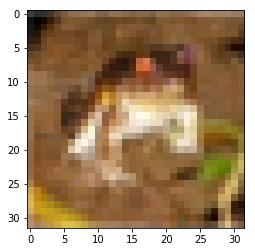

In [14]:
plt.imshow(X[0])

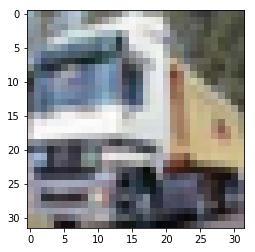

In [15]:
plt.imshow(X[1])

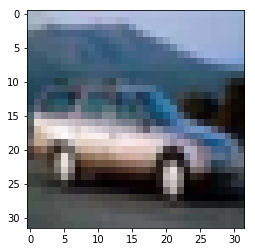

In [16]:
plt.imshow(X[4])

# 5. Helper function to handle data

In [17]:
def one_hot_encode(vec, vals = 10) :
    '''
    For use to one-hot encode the 10 - possible labels.
    '''
    
    n = len(vec) 
    out = np.zeros((n, vals))
    out[range(n), vec]  = 1
    return out

Inialize the Training Images, Labels & Test images, Test Labels

In [18]:
class CifarHelper() :
    
    def __init__(self) :
        self.i = 0
        
        self.all_train_batches = [ data_batch1, data_batch2, data_batch3, data_batch4, data_batch5] # Train data
        self.test_batch = [test_batch] # Test data
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
        
    def set_up_images(self) :
        
        print("Setting up Training Images and Labels :")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len  = len(self.training_images)
        print("Training images count :", train_len)
        
        self.training_images = self.training_images.reshape(train_len, 3, 32, 32).transpose(0, 2, 3, 1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]) , 10)
        print("\nSetting up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len  = len(self.test_images)
        print("Training images count :", test_len)
    
        self.test_images = self.test_images.reshape(test_len, 3, 32,32).transpose(0, 2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]) , 10)
    
    def next_batch(self, batch_size) :
        x = self.training_images[self.i : self.i + batch_size].reshape(100, 32, 32, 3)
        y = self.training_labels[self.i : self.i + batch_size] 
      
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y # x  = image and y = label
    

# 6. Run the following code to initialize CifaHelper and Set up Images

In [19]:
ch = CifarHelper()
ch.set_up_images()

Setting up Training Images and Labels :
Training images count : 50000

Setting up Test Images and Labels
Training images count : 10000


# 7. Creating the Model

In [20]:
import tensorflow as tf
    

C:\Users\Sreekanth\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [21]:
x = tf.placeholder(tf.float32, shape = [None, 32, 32, 3])
y_true = tf.placeholder(tf.float32, shape = [None, 10] )

hold_prob = tf.placeholder(tf.float32) # drop outs.

# 8 . Appling the CNN Helper functions. We can get from MNIST

In [22]:
def init_weights(shape) :
    init_random_dist = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init_random_dist) # random distribution

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape = shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides =[1,1,1,1], padding ='SAME') # stride = small set of data.

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides =[1, 2,2,1], padding ='SAME')

def convolutional_layer(input_x, shape) :
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size) :
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

# 9 . Create the Layers

In [23]:
convo_1 = convolutional_layer(x, shape =[4, 4, 3, 32]) # 4 * 4 is filter size. 3 different channels 32 image size
convo_1_pooling = max_pool_2by2(convo_1)

convo_2 = convolutional_layer(convo_1_pooling, shape =[4, 4, 32, 64]) # 
convo_2_pooling = max_pool_2by2(convo_2)

# 10 . Create the flattened layer by reshaping the pooling layer

In [24]:
8*8*64

4096

In [25]:
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 8 * 8 * 64])

# 11. Create the fully connected layer

In [26]:
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob = hold_prob)

# 12. Set output to y_pred

In [27]:
y_pred = normal_full_layer(full_one_dropout, 10)

In [28]:
y_pred

<tf.Tensor 'add_3:0' shape=(?, 10) dtype=float32>

# 13 . Apply the Loss function

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y_pred ))

# 14 . Create the Optimizer

In [30]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cross_entropy)

# 15. Create a variable ti initialize all the flobal tf variables

In [31]:
init = tf.global_variables_initializer()

# 16. Run the model by creating a graph Session

In [32]:
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(5000) :
        batch = ch.next_batch(100)
        sess.run(train, feed_dict = { x: batch[0], y_true: batch[1], hold_prob : 0.6})
        
        # print out  message every 100 steps
        if (i % 100 == 0) :
            print('Currently on step {}'.format(i))
            print('Accuracy is: ')
            
            # Test the train model
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))            
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))            
            print(sess.run(acc, feed_dict = { x: ch.test_images, y_true: ch.test_labels, hold_prob : 1.0}))
            print('\n')

Currently on step 0
Accuracy is: 
0.0932


Currently on step 100
Accuracy is: 
0.3104


Currently on step 200
Accuracy is: 
0.3905


Currently on step 300
Accuracy is: 
0.4199


Currently on step 400
Accuracy is: 
0.4379


Currently on step 500
Accuracy is: 
0.4541


Currently on step 600
Accuracy is: 
0.4723


Currently on step 700
Accuracy is: 
0.4821


Currently on step 800
Accuracy is: 
0.4913


Currently on step 900
Accuracy is: 
0.4981


Currently on step 1000
Accuracy is: 
0.5115


Currently on step 1100
Accuracy is: 
0.5138


Currently on step 1200
Accuracy is: 
0.5295


Currently on step 1300
Accuracy is: 
0.5309


Currently on step 1400
Accuracy is: 
0.541


Currently on step 1500
Accuracy is: 
0.5473


Currently on step 1600
Accuracy is: 
0.55


Currently on step 1700
Accuracy is: 
0.5581


Currently on step 1800
Accuracy is: 
0.5628


Currently on step 1900
Accuracy is: 
0.569


Currently on step 2000
Accuracy is: 
0.5666


Currently on step 2100
Accuracy is: 
0.5726


Curr